<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <img src="https://upload.wikimedia.org/wikipedia/fa/thumb/f/fd/University_of_Tehran_logo.svg/1200px-University_of_Tehran_logo.svg.png" style="float:left;width:140px;padding-top: 10px" />
    <div style="font-size: 20px;padding-top: 30px;"><b>پروژه چهارم : یادگیری ماشین</b></div>
    <div style="font-size: 16px;margin-top: 20px;">ثمین مهدی زاده 810196623</div>
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
    در این پروژه به کمک الگوریتم های یادگیری ماشین و استخراج اطلاعات سعی شده است تا قیمت خانه ها تخمین زده شود. برای انجام این کار از مدل های مختلفی استفاده شده است(kNN, Decision tree,Random Forest و ...). همچنین در ادامه نیز به مقایسه ی مدل ها و دقت آن ها در پیش بینی این قیمت ها پرداخته شده است.این کار در ۴ فاز انجام شده است که در ادامه توضیحات مربوط به هر فاز آمده است.
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np
from scipy.stats import norm
import category_encoders as ce
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  VotingRegressor
import math

<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>فاز صفر :  visualization and EDA</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 در این فاز داده های خام مورد بررسی قرار می گیرند. در واقع در این فاز تلاش بر این است که داده ها شناخته شوند تا دید کلی از مجموعه داده ها جهت تجزیه و تحلیل آن ها به دست آید.
  <br/>
    برای شروع، فایل داده ها با نام train.csv خوانده می شود همان طور که مشاهده می شود این فایل شامل 1460 سطر و 81 ستون یا ویژگی است.
</div>

In [2]:
data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 تابع describe اطلاعات عددی مربوط به داده را به ما نشان می دهد مانند تعداد داده های دارای مقدار،میانگین،انحراف معیار،کمینه و بیشینه داده.درصد ها نیز بیان می کند که در هر ستون x% داده ها مقادیر کمتر از مقدار نوشته شده در جدول دارند.برای مثال در مورد ستون LotFrontage می توان گفت که 75% از داده ها مقادیر کمتر از 80 دارند.
</div>

In [3]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 در ادامه به کمک تابع info تعداد داده های غیر null هرستون و نوع داده های موجود در هر ستون را مشاهده کرد.
</div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 یکی دیگر از ویژگی هایی که در این فاز مورد بررسی قرار گرفته است تعداد داده های از دست رفته موجود در هر ستون است.جدول زیر این تعداد را بر اساس ویژگی نشان می دهد اما نکته ای که باید به آن توجه داشت این است که لزوما null بودن به معنی داده از دست رفته نیست و پس از مطالعه فایل description متوجه می شویم بعضی nullها یا معنی هستند به همین علت در قسمت های جلو تعداد داده های از دست رفته دوباره محاسبه شود و در این جا صرفا هدف به دست آوردن nullهای موجود در هر ستون بوده است.
</div>

In [5]:
percent_missing = data.isnull().mean() * 100
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value.sort_values('percent_missing', inplace=True,ascending=False)
missing_value

percent_missing
PoolQC             99.520548
MiscFeature        96.301370
Alley              93.767123
Fence              80.753425
FireplaceQu        47.260274
...                      ...
ExterQual           0.000000
Exterior2nd         0.000000
Exterior1st         0.000000
RoofMatl            0.000000
SalePrice           0.000000

[81 rows x 1 columns]

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 برای این که ارتباط هر ویژگی با ستون هدف را متوجه شویم از ماتریس همبستگی استفاده می کنیم می دانیم هر چه همبستگی میان ویژگی و ستون هدف بیشتر باشد بررسی آن ویژگی در پیش بینی مدل کمک بیشتری می کند.نکته ای که در این جا باید به آن توجه داشت این است که تابع corr تنها همبستگی میان 38ویژگی را نشان می دهد در حالی که در قسمت های بالاتر گفته شده که تعداد ویژگی ها 81 است.علت این امر این است که این تابع تنها همبستگس میان داده های عددی را مشخص می کند و با داده های دسته ای کاری ندارد.
    <br/>
     جدول زیر ۹ تا از ویژگی هایی که بیشترین همبستگی را با ستون هدف(SalePrice)دارند به ترتیب نشان داده است.همچنین این اطلاعات در قالب یک heatmap نیز قابل مشاهده است.برای انتخاب چهار ویژگی باید ویژگی هایی انتخاب شوند که:
    <br/>
&nbsp;&nbsp;&nbsp;۱)بیشترین همبستگی را با ستون هدف داشته باشند.
    <br/>
&nbsp;&nbsp;&nbsp;۲)بین خودشان همبستگی زیادی وجود نداشته باشد چرا که در این صورت انتخاب یکی از آن ها کافی است و ویژگی دیگر از آن جا که ارتباط زیادی با ویژگی انتخاب شده دارد اطلاعات زیادی در اختیار ما قرار نمی دهد.
<br/>
    همان طور که از heatmap دیده می شود GarageCars و GarageArea ضریب همبستگی بالایی دارند(0.88).همچنین TotalBsmtSF و 1stFlrSF از ضریب همبستگی بالایی برخوردارند.مثال های دیگری نیز وجود دارد که می توان به کمک heatmap آن ها را پیدا کرد.
    <br/>
    بنابر توضیحات بالا چهار ویژگی انتخاب شده به صورت زیر در نظر گرفته شده است:
    <br/>
'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'

</div>

correlation
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897

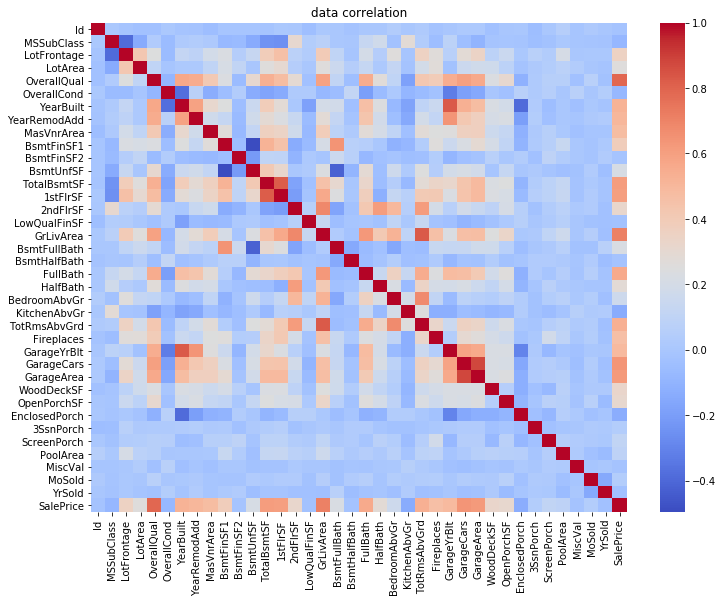

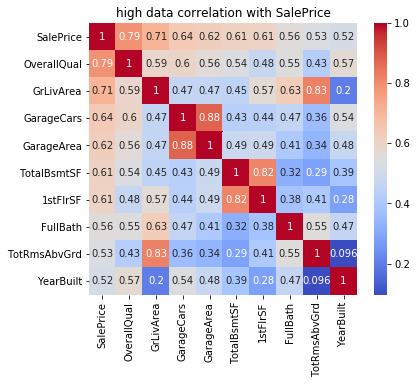

In [6]:
plt.figure(figsize = (12,9))
corr_mat_high = data.corr()['SalePrice'].sort_values(ascending=False)[1:10]
sns.heatmap(data.corr(),cmap = 'coolwarm')
high_corr =  pd.DataFrame({'correlation': corr_mat_high})
plt.title("data correlation")
cols = data.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot = True,cmap = 'coolwarm',yticklabels=cols.values, xticklabels=cols.values)
plt.title("high data correlation with SalePrice")
high_corr

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
جهت تحلیل بیشتر داده از ستون هدف لگاریتم گرفته و نتایج را بررسی می کنیم.
</div>

In [7]:
def log_dataframe_on_sale_price(data):
    log_data = data.copy()
    log_data["SalePrice"] = np.log2(log_data["SalePrice"])
    return log_data


correlation
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608

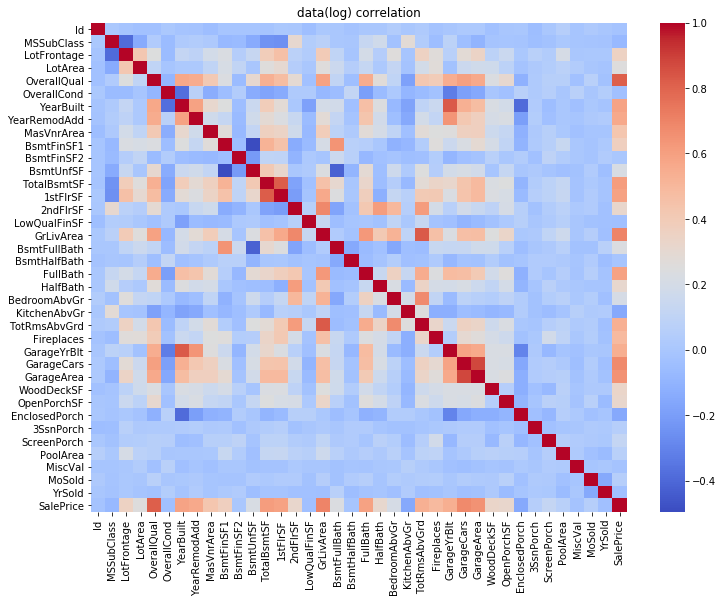

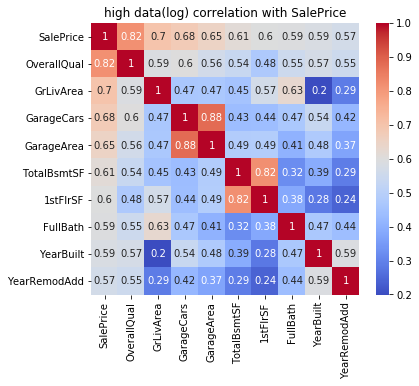

In [8]:
log_data = log_dataframe_on_sale_price(data)
plt.figure(figsize = (12,9))
sns.heatmap(log_data.corr(),cmap = 'coolwarm')
corr_mat_high = log_data.corr()['SalePrice'].sort_values(ascending=False)[1:10]
high_corr =  pd.DataFrame({'correlation': corr_mat_high})
plt.title("data(log) correlation")
cols = log_data.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(log_data[cols].values.T)
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot = True,cmap = 'coolwarm',yticklabels=cols.values, xticklabels=cols.values)
plt.title("high data(log) correlation with SalePrice")
high_corr

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
پس از لگاریتم گیری متوجه می شویم که همبستگی داده ها بیشتر شده است و با خطای کمتری می توانیم این وابستگی را به صورت یک خط نشان دهیم.علت این امر این است که لگاریتم دامنه ی متغیر ها را کاهش می دهد و در حین حفظ اختلافات مقیاس آن ها را کاهش می دهد و این موضوع باعث می شود که ویژگی ها به یکدیگر نزدیک تر شوند بنابراین در برخی مدل ها برای نزدیک کردن ویژگی ها به یکدیگر از این روش استفاده می شود.
    <br/>
    پس از بررسی heatmap باید به این سوال پاسخ داد که آیا استفاده از نمودار هم بستگی برای بررسی تمام ویژگی کافی است یا خیر؟در جواب این سوال باید گفت که نمودار وابستگی تنها ویژگی های عددی را مورد بررسی قرار می دهد در حالی که ممکن است برخی ویژگی های دسته ای نیز تاثیر زیادی بر روی قیمت یک خانه بگذارند به این منظور این ستون ها نیز باید بررسی شوند که در قسمت های بعدی راجع به آن حرف زده می شود.
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
جهت بررسی ویژگی های انتخاب شده رابطه ی آن با ستون هدف توسط نمودار کشیده شده است.دو نوع بررسی انجام شده است.در نوع اول نمودار هر یک از ویژگی ها با قیمت اصلی موجود در داده کشیده شده است و در نوع دوم رابطه ی میان این ویژگی ها با لگاریتم قیمت رسم شده است.همچنین در هر کدام خطی که این دو ویژگی را به هم مرتبط می کند نیز نشان داده شده است.
</div>

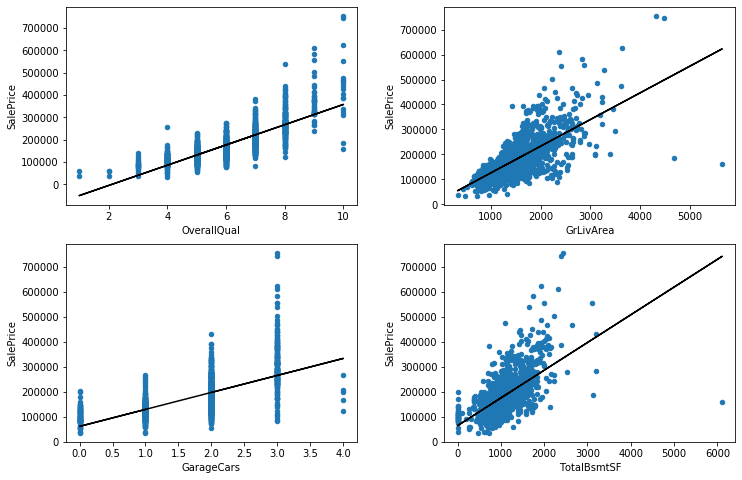

In [9]:
def draw_numerical_plt(data,clos):
    fig, axes = plt.subplots(len(cols)//2, 2, figsize=(12,8), squeeze=False)
    fig.subplots_adjust(wspace=0.3)
    for i, col in enumerate(cols):
        x = data[col]
        y = data['SalePrice']
        data.plot(kind='scatter', x=col, y='SalePrice', ax=axes[i//2, i%2])
        m, b = np.polyfit(x, y, 1)
        axes[i//2, i%2].plot(x, m*x + b,color = 'black')

    
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

draw_numerical_plt(data,cols)


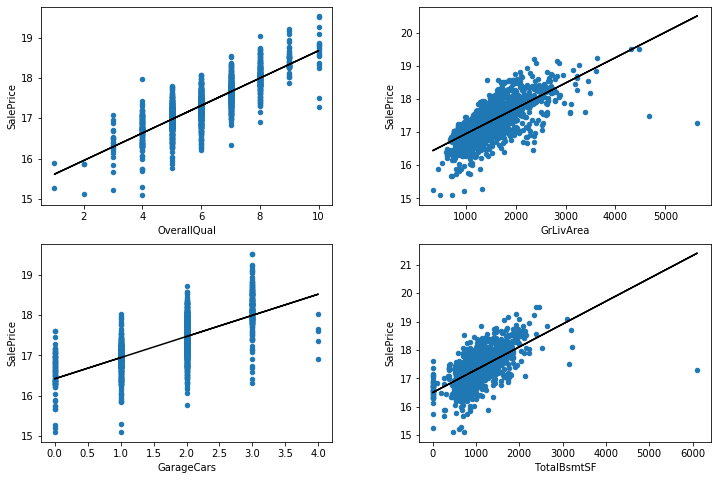

In [10]:
draw_numerical_plt(log_data,cols)

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
با بررسی این دو نمودار می توان دید که در حالتی که از لگاریتم استفاده شده است نقاط به خط رسم شده نزدیک تر هستند و این به این معنی است که در صورت استفاده از لگاریتم خط رسم شده دقت بیشتری می دهد.
</div>

Text(0.5, 1.0, 'Sales price distribution on data')

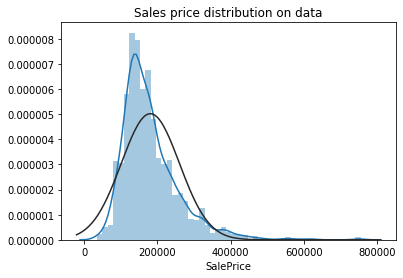

In [11]:
sns.distplot(data['SalePrice'], fit=norm);
plt.title("Sales price distribution on data")

Text(0.5, 1.0, 'Sales price distribution on data(log)')

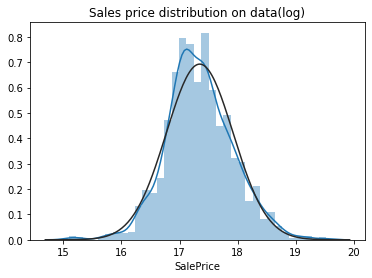

In [12]:
sns.distplot(log_data['SalePrice'], fit=norm);
plt.title("Sales price distribution on data(log)")

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
همچنین در صورتی که توزیع قیمت خانه را در دو حالت فوق رسم کنیم می توان دید که در نموداری که از لگاریتم استفاده شده است توزیع شبیه به توزیع نرمال شده است.
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
در ادامه نیز ویژگی های عددی و دسته ای به همراه تعداد آن ها به دست آمده است.
</div>

In [13]:
num_cols = data._get_numeric_data().columns
num_cols = list(num_cols) 
print("neumerical num: "+str(len(num_cols)))
print(num_cols)

neumerical num: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [14]:
cols = data.columns
categorical = list(set(cols) - set(num_cols))
print("cateorical num: "+str(len(categorical)))
print(categorical)

cateorical num: 43
['FireplaceQu', 'PoolQC', 'MasVnrType', 'GarageFinish', 'LotShape', 'LandSlope', 'ExterCond', 'MiscFeature', 'Neighborhood', 'Heating', 'HouseStyle', 'BsmtFinType1', 'Functional', 'Utilities', 'RoofMatl', 'HeatingQC', 'Alley', 'Exterior2nd', 'LotConfig', 'LandContour', 'BsmtCond', 'Condition1', 'KitchenQual', 'Electrical', 'GarageCond', 'CentralAir', 'GarageQual', 'PavedDrive', 'Foundation', 'BldgType', 'BsmtFinType2', 'BsmtExposure', 'ExterQual', 'Fence', 'SaleCondition', 'MSZoning', 'Exterior1st', 'Condition2', 'GarageType', 'BsmtQual', 'RoofStyle', 'Street', 'SaleType']


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
جهت انتخاب ویژگی های دسته ای به این صورت عمل می شود که به ازای هر کلاس موجود در یک ویژگی،میانگین قیمت در هر کلاس محاسبه می شود. در این صورت هر چه میانگین های محاسبه شده از یکدیگر اختلاف بیشتری داشته باشند به این معنی است که آن ویژگی برای پیش بینی قیمت مناسب تر است.برای مثال فرض کنید یکی از ویژگی ها نزدیکی به مغازه است که دارای دو کلاس دور و نزدیک است طبیعی است اگر خانه به مغازه نزدیک تر باشد میانگین قیمت آن تفاوت زیادی با خانه ای دور افتاده دارد اما اگر همین میانگین را برای سایز اتاق که دارای دو دسته کوچک و بزرگ است در نظر بگیریم این میانگین ها نزدیک به هم هستند پس دوری یا نزدیکی یک خانه به مغازه یا مرکز شهر ویژگی مهم تری نسبت به اندازه اتاق برای تخمین قیمت خانه است.بنابراین ویژگی هایی انتخاب می شوند که میانگین قیمت آنها دارای واریانس بیشتری باشد.
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
جهت محاسبه ی واریانس ها  و انتخاب ویژگی های دسته ای نیز دوباره نتایج را بر روی خود قیمت ها و لگاریتم آن بررسی می کنیم.
</div>

In [15]:
def get_categorical_data_variance(columns,data):
    class_variance = {}
    for col in columns:
        mean_group = data.groupby(col)['SalePrice'].mean()
        class_variance[col] = mean_group.var()
    return pd.DataFrame.from_dict({"categorical class":sorted(class_variance, key=class_variance.get,reverse=True),"variance":sorted(class_variance.values(),reverse=True)})

In [16]:
get_categorical_data_variance(categorical ,data)

categorical class      variance
0             PoolQC  2.641376e+10
1          ExterQual  1.480344e+10
2        KitchenQual  9.715970e+09
3           BsmtQual  8.905383e+09
4         Condition2  7.110827e+09
5           RoofMatl  6.365378e+09
6        FireplaceQu  6.200142e+09
7       Neighborhood  4.452252e+09
8           BsmtCond  4.431637e+09
9        MiscFeature  4.160344e+09
10        GarageQual  3.604193e+09
11       Exterior1st  3.328971e+09
12        CentralAir  3.274237e+09
13          SaleType  3.254003e+09
14     SaleCondition  3.160051e+09
15          MSZoning  3.086145e+09
16       Exterior2nd  3.085974e+09
17        MasVnrType  2.978916e+09
18         ExterCond  2.936176e+09
19        GarageType  2.718214e+09
20      GarageFinish  2.435992e+09
21           Heating  2.216818e+09
22         HeatingQC  2.211000e+09
23        Electrical  1.968282e+09
24        Foundation  1.716946e+09
25      BsmtExposure  1.491442e+09
26        GarageCond  1.433325e+09
27       LandContour  1.402235e+09
28        PavedDrive  1.387240e+09
29        HouseStyle  1.374190e+09
30            Street  1.297444e+09
31        Condition1  1.211697e+09
32      BsmtFinType1  1.126310e+09
33             Alley  1.047973e+09
34          LotShape  9.815817e+08
35        Functional  9.775311e+08
36         Utilities  9.439928e+08
37         RoofStyle  8.402195e+08
38          BldgType  7.965682e+08
39         LotConfig  4.507339e+08
40      BsmtFinType2  4.261339e+08
41             Fence  3.921532e+08
42         LandSlope  1.560636e+08

In [17]:
get_categorical_data_variance(categorical ,log_data)

categorical class  variance
0          ExterQual  0.817775
1           BsmtCond  0.544884
2        KitchenQual  0.502924
3           BsmtQual  0.422518
4         Condition2  0.412351
5        MiscFeature  0.412183
6           MSZoning  0.394256
7             PoolQC  0.360757
8         CentralAir  0.337208
9          ExterCond  0.318085
10           Heating  0.290798
11       Exterior1st  0.274921
12      Neighborhood  0.251105
13        Electrical  0.247149
14       FireplaceQu  0.244433
15        GarageQual  0.227751
16         HeatingQC  0.201013
17     SaleCondition  0.190576
18          RoofMatl  0.188646
19          SaleType  0.187551
20        GarageType  0.163898
21       Exterior2nd  0.161960
22        MasVnrType  0.147415
23        Foundation  0.141501
24      GarageFinish  0.138372
25            Street  0.133444
26        PavedDrive  0.123164
27        GarageCond  0.121749
28             Alley  0.108882
29        Functional  0.105530
30        HouseStyle  0.086139
31        Condition1  0.085934
32       LandContour  0.073993
33         RoofStyle  0.064858
34      BsmtExposure  0.060119
35      BsmtFinType1  0.059343
36          BldgType  0.054750
37          LotShape  0.053593
38         Utilities  0.038686
39             Fence  0.033359
40         LotConfig  0.026395
41      BsmtFinType2  0.018426
42         LandSlope  0.006297

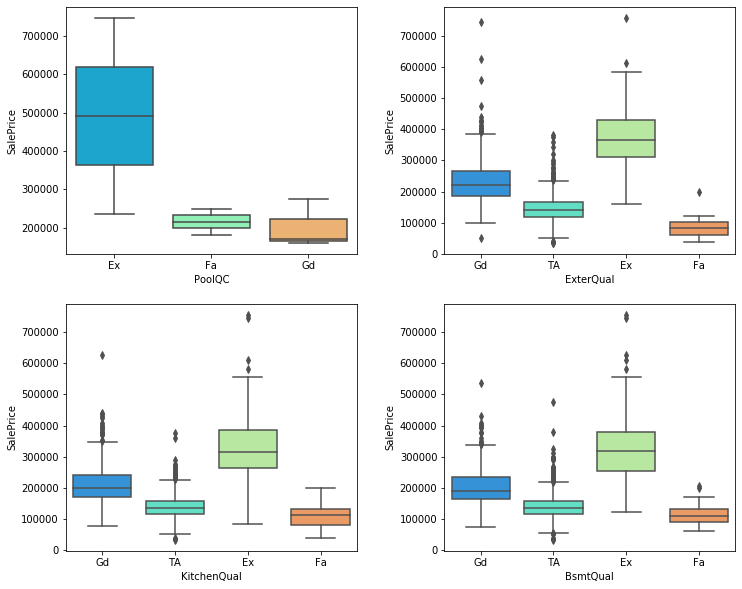

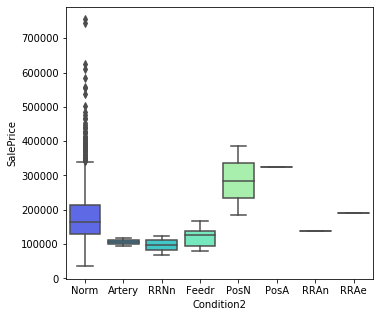

In [18]:
classes = get_categorical_data_variance(categorical ,data)
columns = list(classes['categorical class'][:5])

fig, axes = plt.subplots((len(columns)-1)//2, 2, figsize=(12,10), squeeze=False)
fig.subplots_adjust(wspace=0.3)
for i, col in enumerate(columns[:-1]):
        sns.boxplot(x=col, y="SalePrice", data=data,palette='rainbow',ax=axes[i//2, i%2])
plt.figure(figsize = (5.5,5))
sns.boxplot(x=columns[-1], y="SalePrice", data=data,palette='rainbow')


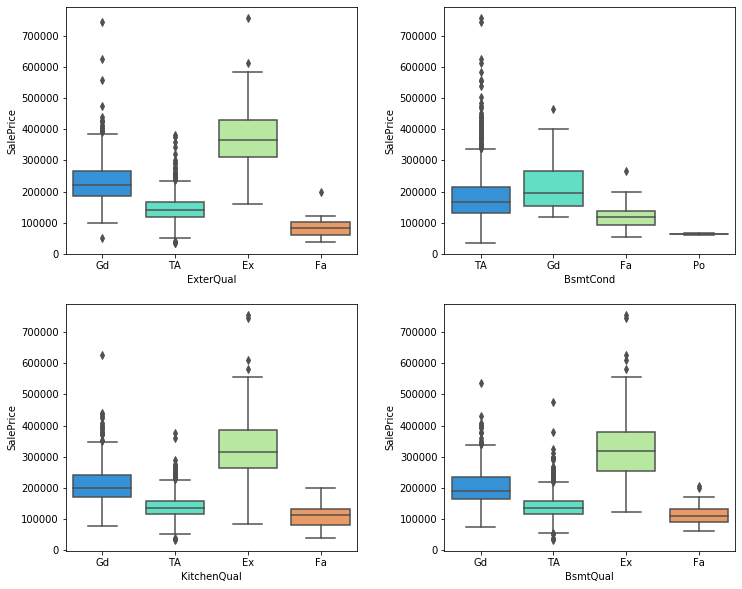

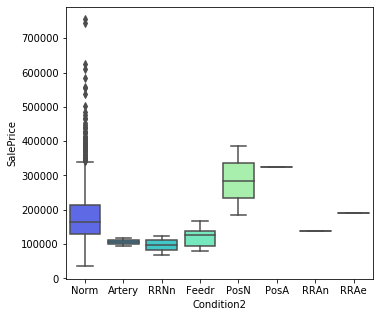

In [19]:
classes = get_categorical_data_variance(categorical ,log_data)
columns = list(classes['categorical class'][:5])
fig, axes = plt.subplots((len(columns)-1)//2, 2, figsize=(12,10), squeeze=False)
fig.subplots_adjust(wspace=0.3)
for i, col in enumerate(columns[:-1]):
        sns.boxplot(x=col, y="SalePrice", data=data,palette='rainbow',ax=axes[i//2, i%2])
plt.figure(figsize = (5.5,5))
sns.boxplot(x=columns[-1], y="SalePrice", data=data,palette='rainbow')

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    می توان دید که در صورت استفاده از لگاریتم به واریانس های کوچک تری می رسیم.هم چنین ترتیب بعضی از ویژگی ها نیز تغییر می کند.برای مثال PoolQC در حالت اصلی در جایگاه اول قرار دارد در صورتی که در لگاریتم ExternalQual در جایگاه اول قرار دارد اگر نمودار این دو را مقایسه کنیم متوجه می شویم در PoolQC بعضی نقاط اشتراک دارند که این موضوع باعث سخت تر تخمین زدن ما می شود در صورتی که در ExternalQual تقریبا اشتراکی بین جعبه ها وجود ندارد.در واقع انگار استفاده از لگاریتم نتایج بهتری می دهد.بنابراین برای انتخاب ویژگی، سه ویژگی برتر در حالت لگاریتمی استفاده می شود اما اگر دقت کنیم می بینیم نمودار ویژگی های با پسوند Qual تقریبا شبیه به هم هستند بنابراین ممکن است اطلاعات یکسانی را در اختیار ما قرار دهند در این صورت بهتر است از ویژگی های بعدی استفاده شود.
</div>

<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>فاز اول: preprocessing</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     در این فاز داده ها تمیز می شوند، اطلاعات از دست رفته ی آن ها به کمک روش های گوناگون پر می شود همچنین برخی عملیات مانند استاندارد سازی بر روی داده ها انجام می شود تا در مرحله ی آموزش دقت بیشتری داشته باشیم.
    <br/>
    برای پر کردن داده های خالی روش های گوناگونی وجود دارد.یکی از این روش ها جایگذاری میانگین هر ستون در سلول های خالی است.روش دیگر استفاده از میانه هر ستون است.باتوجه به نوع داده ای که به ما داده می شود ممکن است یکی از این روش ها بهتر عمل کند.برای مثال در صورتی که همه داده ها در رنج تقریبا یکسانی قرار داشته باشند و داده ی پرتی نداشته باشیم،استفاده از میانگین روش خوبی است چرا که در این صورت میانگین هر ستون می تواند نماینده ی خوبی برای داده های آن ستون باشد همچنین لازم نیست هزینه ای برای سورت داده ها بدهیم تا میانه را به دست آوریم در غیر این صورت ممکن است داده ای وجود داشته باشد که باعث شود میانگین کلی داده خیلی پایین یا خیلی بالا برود و باعث شود میانگین تخمین خیلی خوبی برای داده های خالی نباشد.در این صورت استفاده از میانه راه بهتری است چرا که داده ها سورت می شوند و داده ی میانی برای قسمت های خالی در نظر گرفته می شود.در این صورت نقش داده های پرت کم می شود.همچنین می توانیم داده های خالی را با صفر پر کنیم،در این صورت باید توجه داشت که ممکن توزیع داده بهم بریزید به همین جهت گاهی أوقات داده های خالی را با انتخاب تصادفی از میان داده های موجود انتخاب می کنند تا توزیع داده به هم نریزد. 
    <br/>
    یکی دیگر از روش ها،دسته بندی داده ها بسته براساس ویژگی های آن هاست یعنی براساس یک سری ویژگی داده ها را دسته بندی کنیم تا داده های شبیه به هم در یک دسته قرار گیرند(برای مثال استفاده از KNN) و برای هر سلول خالی میانگین دسته اش را جاگذاری کنیم نه میانگین کل داده ها.اگرچه این روش نسبت به میانگین هزینه ی بیشتری دارد ولی ممکن است درجاهایی که احتیاج به خطای کمتری داریم این راه بهتر عمل کند و داده های از رست رفته را با دقت بیشتری بازیابی کند.
    <br/>
    
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    برای پر کردن داده ها در ابتدا لازم است ستون های با داده گم شده را پیدا کنیم همان طور که در قسمت قبل توضیح داده شد مقدار نال ممکن است به معنی داده گم شده نباشد بنابراین با خواندن فایل description ستون هایی که دارای نال معنی دار هستند شناسایی کرده و از لیست ستون با داده های گم شده حدف می کنیم.
</div>

In [20]:
miss = {}
for col in data.columns:
    miss[col] = data[col].isnull().mean() * 100
missing_value = pd.DataFrame({'column':list(miss.keys()),'percent_missing':list(miss.values())})
missing_value.sort_values('percent_missing', inplace=True,ascending=False)
missing_value = missing_value[missing_value['percent_missing']>0]
missing_value

column  percent_missing
72        PoolQC        99.520548
74   MiscFeature        96.301370
6          Alley        93.767123
73         Fence        80.753425
57   FireplaceQu        47.260274
3    LotFrontage        17.739726
59   GarageYrBlt         5.547945
64    GarageCond         5.547945
58    GarageType         5.547945
60  GarageFinish         5.547945
63    GarageQual         5.547945
35  BsmtFinType2         2.602740
32  BsmtExposure         2.602740
30      BsmtQual         2.534247
31      BsmtCond         2.534247
33  BsmtFinType1         2.534247
26    MasVnrArea         0.547945
25    MasVnrType         0.547945
42    Electrical         0.068493

In [21]:
numerical = data._get_numeric_data().columns
numerical = list(num_cols) 
cols = data.columns
categorical = list(set(cols) - set(numerical))
numerical_miss = missing_value[missing_value.column.isin(numerical)]
categoricak_miss = missing_value[missing_value.column.isin(categorical)]
print("neumerical missing")
numerical_miss

neumerical missing


column  percent_missing
3   LotFrontage        17.739726
59  GarageYrBlt         5.547945
26   MasVnrArea         0.547945

In [22]:
print("cateorical missing")
categoricak_miss

cateorical missing


column  percent_missing
72        PoolQC        99.520548
74   MiscFeature        96.301370
6          Alley        93.767123
73         Fence        80.753425
57   FireplaceQu        47.260274
64    GarageCond         5.547945
58    GarageType         5.547945
60  GarageFinish         5.547945
63    GarageQual         5.547945
35  BsmtFinType2         2.602740
32  BsmtExposure         2.602740
30      BsmtQual         2.534247
31      BsmtCond         2.534247
33  BsmtFinType1         2.534247
25    MasVnrType         0.547945
42    Electrical         0.068493

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    تکه کد زیر ستون هایی که دارای null معنا دار هستند را حذف کرده و در نهایت داده هایی که واقعا مقدار گمشده دارند مشخص شده است.همان طور که دیده می شود بیشترین مقدار مربوط به LotFrontage و کمترین مربوط به Electricalاست.
</div>

In [23]:
NA_meaning = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType'
              ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','FireplaceQu']
real_missing = missing_value[~missing_value.column.isin(NA_meaning)]
print("real missing")
real_missing

real missing


column  percent_missing
3   LotFrontage        17.739726
59  GarageYrBlt         5.547945
26   MasVnrArea         0.547945
25   MasVnrType         0.547945
42   Electrical         0.068493

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 در صورتی که درصد داده های گم شده بالا باشد(بالای 60-70) وبرای بازیابی داده فقط از خود ویژگی استفاده شود ممکن است حذف ویژگی ایرادی نداشته باشد چرا که اطلاعات زیادی راجع به آن موجود نیست و مثل این است که درصد بیشتر داده را به کمک درصد پایینی از اطلاعات پر کنیم که حتی می تواند باعث خطا در مدل شود.
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 ممکن است در این گام احتیاج به نرمال سازی یا استاندارد کردن داده ها داشته باشیم.در ادامه راجع به این دو مفهوم صحبت می شود.
    <br/>
    استاندار سازی به این منظور انجام می شود که داده ها داری میانگین صفر و انحراف معیار یک باشند این کار هنگام مقایسه ویژگی ها با واحد های مختلف مورد استفاده قرار می گیرد چرا که متغیر هایی که در مقیاس های مختلف اندازه گیری می شوند به طور مساوی در تجزیه و تحلیل کمک نمی کنند و ممکن است باعث ایجاد بایاس شوند. به عنوان مثال، متغیری که بین 0 تا 1000 باشد ، از متغیری که بین 0 تا 1 باشد ، تاثیر بیشتری خواهد داشت. استفاده از این متغیرها بدون استاندارد سازی ، به متغیر با دامنه بزرگتر (1000)اهمیت بیشتری می دهد. تبدیل داده ها به مقیاس های قابل مقایسه می تواند از این مشکل جلوگیری کند.
    <br/>
    هدف از نرمال کردن داده ها این است که همه ی داده ها در یک رنج بیاوریم(برای مثال بین صفر و یک)این ویژگی نیز به ما کمک می کند تا تاثیری که داده های با رنج بالا بر روی آموزش می گذارند عادلانه باشد اما در این روش چون همه ی داده ها در یک رنج قرار می گیرد داده های نویز به راحتی قابل تشخیص نیستند.
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     در قسمت بعدی تاثیر این دو روش بر روی داده ها بررسی می شود.
</div>    

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>one hot encoding</li>
     در این روش به ازای هر کدام از کلاس های موجود در یک ویژگی به دیتاست ستون اضافه می شود و برای هر داده ای که در آن کلاس جا گرفته مقدار ستون مورد نظر برابر یک قرار داده می شود در غیر این صورت مقدار این ستون برابر صفر در نظر گرفته می شود.
    <li>label encoding</li>
    این روش بیشتر برای داده های ترتیبی مورد استفاده قرار می گیرد.داده های ترتیبی داده هایی هستند که در آن ها ترتیب مشخص است برای مثال مقدار کلاس های آن first,second,third است جهت اینکد کردن این کلاس ها یک عدد صحیح به هر کدام نسبت می دهیم. 
    <br/>
    طبق توضیحات بالا می توان نتیجه گرفت از یک روش نباید برای تمام داده ها استفاده کرد برای مثال اگر داده ترتیبی باشد به جای استفاده از one_hot_encoding بهتر است از label_encoding استفاده کنیم چرا که مدل ما می تواند از ترتیب موجود در داده ها استفاده کند.
    
</div>    

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    در قسمت های بالاتر راجع به همبستگی بین داده ها گفته شد سوالی که پیش می آید این است که آیا می توانیم برخی ستون ها را حذف کنیم؟در پاسخ باید گفت داده هایی که وابستگی بالایی با یکدیگر دارند تقریبا اطلاعات یکسانی را در اختیار ما قرار خواهند داد و می توان فقط از یکی از آن ها استفاده کرد.
</div>

In [24]:
def fill_not_real_nans(data):
    result = data.copy()
    numerical =result._get_numeric_data().columns
    numerical = list(numerical) 
    cols = result.columns
    categorical = list(set(cols) - set(numerical))
    NA_meaning = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType'
                      ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
    NA_meaning = [l for l in NA_meaning if l in list(result.columns)]
    for col in NA_meaning :
        if col in numerical:
            result[col] = result[col].fillna(0)
        else:
            result[col] = result[col].fillna('None')
    return result  
    
    
def drop_all_columns_missing(data):
    result = data.copy()
    miss = {}
    for col in data.columns:
        miss[col] = result[col].isnull().mean() * 100
    missing_value = pd.DataFrame({'column':list(miss.keys()),'percent_missing':list(miss.values())})
    missing_value.sort_values('percent_missing', inplace=True,ascending=False)
    missing_value = missing_value[missing_value['percent_missing']>0]
    NA_meaning = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType'
                      ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
    real_missing = missing_value[~missing_value.column.isin(NA_meaning)]
    real_missing = list(real_missing.column)
    result = result.drop(real_missing,axis = 1)
    return result

def fill_missing_by_median(data):
    result = data.copy()
    numerical = result._get_numeric_data().columns
    numerical = list(numerical) 
    for col in numerical:
        result[col] = result[col].fillna(result[col].median())
    return result

def fill_missing_by_mean(data):
    result = data.copy()
    numerical = result._get_numeric_data().columns
    numerical = list(numerical) 
    for col in numerical:
        result[col].fillna(result[col].mean(), inplace=True)
    return result

def fill_missing_by_mode(data,column_type):
    result = data.copy()
    cols = list(result._get_numeric_data().columns)
    if(column_type != 'numerical'):
        cols = list(set(data.columns) - set(cols))
    for col in cols:
        result[col].fillna(result[col].mode(), inplace=True)
    return result

def standardize_data(data):
    result = data.copy()
    numerical = list(result._get_numeric_data().columns)
    numerical.remove('SalePrice')
    for col in numerical:
        result[col]=(result[col]-result[col].mean())/result[col].std()
    return result

def normalize_data(data):
    result = data.copy()
    numerical = list(result._get_numeric_data().columns)
    numerical.remove('SalePrice')
    for col in numerical:
        result[col]=(result[col]-result[col].min())/(result[col].max()-result[col].min())
    return result

def one_hot_encoding(data):
    result = data.copy()
    numerical = result._get_numeric_data().columns
    numerical = list(numerical) 
    cols = result.columns
    categorical = list(set(cols) - set(numerical))
    for col in categorical:
        r = ce.OneHotEncoder().fit_transform(data[col])
        result = pd.concat([result, r], axis=1).drop([col], axis=1)
    return result

def label_encoding(data):
    result = data.copy()
    numerical = result._get_numeric_data().columns
    numerical = list(numerical) 
    cols = result.columns
    le = preprocessing.LabelEncoder()
    categorical = list(set(cols) - set(numerical))
    for col in categorical:
        le.fit(data[col].astype(str))
        result[col] = le.transform(data[col].astype(str))
    return result

def target_encoding(data):
    result = data.copy()
    numerical = result._get_numeric_data().columns
    numerical = list(numerical) 
    cols = result.columns
    categorical = list(set(cols) - set(numerical))
    for col in categorical:
        result[col] =  ce.TargetEncoder().fit_transform(data[col], data['SalePrice'])
    return result

def denormalize_result(normalized_data,orginal_data):
    for idx,element in enumerate(normalized_data):
        normalized_data[idx]=(element)*(orginal_data[col].max()-orginal_data[col].min())+orginal_data[col].min()
    return normalized_data

def destandardize_result(normalized_data,orginal_data):
    col = 'SalePrice'
    for idx,element in enumerate(normalized_data):
        normalized_data[idx]=(element)*(orginal_data[col].std())+orginal_data[col].mean()
    return normalized_data    


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    جهت آموزش و تست داده لازم است داده ها را به دو دسته ی train و test تقسیم کنیم یک روش این است که p درصد اول داده ها را برای یادگیری و مابقی را برای ارزیابی اختصاص دهیم.برای انتخاب مناسب p لازم است ابتدا دو مفهوم معرفی شود:
    <br/>
    ۱)بایاس:
    <br/>
    بایاس، تفاوت بین پیش بینی میانگین مدل ما با مقدار درستی است که سعی داریم آن را پیش بینی کنیم مدل با بایاس بالا توجه زیادی به داده های آموزشی ندارد و مدل را بیش از حد ساده می کند که منجر به خطای زیاد در داده های آموزشی و تست می شود.
    <br/>
    ۲)واریانس:
    <br/>
    واریانس،تغییر پذیری پیش بینی مدل را بیان می کند.مدل با واریانس بالا توجه زیادی به داده های آموزشی می کند و برای داده هایی که قبلا ندیده است پیش بینی خوبی انجام نمی دهد.در واقع این مدل ها در داده های آموزشی بسیار خوب عمل می کنند اما خطای آن ها در داده های تست زیاد است.
    <br/>
    pجایی انتخاب می شود که تاحد ممکن بایاس و واریانس کم شوند
    <br/>
    <img src="img/p.png" style="width:50%;padding-top: 10px;align:center" />
    <br/>
     در شکل بالا افزایش p تا مقداری باعث می شود هر دو داده ی تست و آموزش بهبود یابند اما از جایی به بعد با افزایش احتمال داده به سمت داده های آموزشی جهت می گیرد و سعی می کند کوچک ترین جزئیات را مدل کند که باعث خطا در داده ی تست می شود.
    <br/>
    روش های دیگر تقسیم داده ها عبارت اند از:
    <br/>
    <li>cross validation</li>
    پس از تقسیم train و test و بررسی عمل کرد جای train و test عوض شده و دوباره نتایج بررسی می شوند.
    <li>leave-one-out cross validation</li>
    هر سری تکه ها مختلفی از داده به عنوان تست انتخاب می شود و بقیه به آموزش تعلق می گیرد.
    <li>k-fold cross validation</li>
    هر سری به اندازه k دسته انتخاب می کند و با حرکت بر روی داده تقسیم train و test را انجام می دهد.
    <br/>
    تقسیم داده ها به صورت تصادفی در برخی موارد می تواند مفید باشد برای مثال ممکن است داده های آموزش با ترتیب خاصی قرار بگیرند و داده های شبیه به هم در کنار هم قرار داشته باشند که در این صورت با انتخاب  pتای اول به عنوان داده ی آموزشی مدل خوبی به دست نمی آید.
</div>

In [81]:
classes = get_categorical_data_variance(categorical ,data)
low_variance = list(classes['categorical class'][15:])

numerical = data._get_numeric_data().columns
numerical = list(numerical) 
cols = data.columns
categorical = list(set(cols) - set(numerical))

p_data = data.drop(low_variance,axis = 1)
p_data = fill_not_real_nans(p_data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = standardize_data(p_data)

x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)

train = pd.concat([X_train, y_train], axis=1)

test = pd.concat([X_test, y_test], axis=1)
    


<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>فاز دوم: Model Training ,Evaluation and Hyperparameter Tuning</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
     در این سه فاز سه مدل بر پایه k-Nearest-Neighbors,Decision Tree و Linear Regression به کمک کتابخانه Scikit-Learn پیاده سازی شده است و به کمک رسم نمودار هایپر پارامتر بهینه برای هر کدام از نمونه ها انتخاب شده است.در انتها نیز روش های مختلف پیش پردازش بر روی داده ها امتحان شده و با یکدیگر مقایسه می شوند.
    <br/>
    در ابتدا مفاهیم underfitting،overfitting توضیح داده می شود و بررسی می شود که کدام یک از مدل ها underfitting  یا overfitting دارند و سپس به کمک این مفهوم نقطه بهینه برای هایپر پارامتر ها انتخاب می شود.
    <br/>
    <li>مفهوم Over-fit</li>
    عملکرد یادگیری بسیار خوب بوده، اما عملکرد بر روی مجموعه داده ای های دیگر (dataset) خوب نیست. درواقع Over-fitting به این موضوع اشاره دارد که مدل ما بسیار خوب آموزش دیده است اما به خوبی تعمیم نیافته است
    <li>مفهوم Under-fit</li>
    نه تنها یادگیری خوب نبوده است، بلکه عملکرد آن بر روی مجموعه داده ای های دیگر نیز ضعیف است. این مفهوم زمانی اتفاق میفتد که مدل بسیار ساده است و برای یادگیری مناسب نیست.
    <img src="img/fit.png" style="width:50%;padding-top: 10px;align:center" />
    بنابراین برای انتخاب هایپر پارامتر بهینه جایی انتخاب می شود که خطا علاوه بر این که برای هر دو داده ی آموزش و تست کم  است نزدیک به هم نیز باشد.
        
</div>

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;"> 
    <b>KNN</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    هایپر پارامتر انتخاب شده در این قسمت n_neighbors یا تعداد همسایگان است.به این منظور این مقدار را از 1 تا 100 تغییر داده و بر اساس آن خطای حاصل را در قالب یک نمودار نشان می دهیم.
</div>

In [26]:
def KـNearestNeighboursRegression(train,test):
    train_MAE,train_RMSE,test_MAE,test_RMSE = [],[],[],[]
    for i in range(1,100):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])
        
        y_pred_test = knn.predict(test.drop(['SalePrice'], axis=1))
        y_pred_train = knn.predict(train.drop(['SalePrice'], axis=1))

        
        MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
        RMSE_train = math.sqrt(mean_squared_error(train['SalePrice'],y_pred_train))
        
        train_MAE.append(MAE_train)
        train_RMSE.append(RMSE_train)
        
        MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
        RMSE_test = math.sqrt(mean_squared_error(test['SalePrice'],y_pred_test))
        
        test_MAE.append(MAE_test)
        test_RMSE.append(RMSE_test)

    fig, axes = plt.subplots(1, 2, figsize=(12,5), squeeze=False)
    fig.subplots_adjust(wspace=0.3)
    axes[0][0].plot(list(range(1, 100)),test_MAE, label='Test')
    axes[0][0].plot(list(range(1, 100)),train_MAE , label='Train')
    axes[0][0].set_ylabel('MAE')
    axes[0][0].set_xlabel('Number of Neighbours')
    axes[0][0].set_title('K Nearest Neighbours')
    axes[0][0].legend()
    axes[0][1].plot(list(range(1, 100)),test_RMSE, label='Test')
    axes[0][1].plot(list(range(1, 100)),train_RMSE , label='Train')
    axes[0][1].set_ylabel('RMSE')
    axes[0][1].set_xlabel('Number of Neighbours')
    axes[0][1].set_title('K Nearest Neighbours')
    axes[0][1].legend()

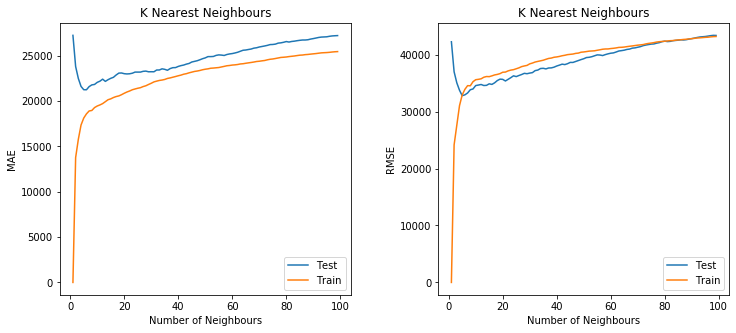

In [27]:
KـNearestNeighboursRegression(train,test)

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    با توجه به نمودار ها می توان دید که در حدود همسایه ی ۵ هر دو داده ی تست و آموزش به یک جا رسیده اند و پس از آن مقدار هر دو زیاد شده است.اما می توان دید که مدل دچار overfitting نیست و تقریبا داده ی train و test مقدار خطاهای یکسانی دارند.
    <br/>
    تابع زیر با گرفتن داده های آموزش و تست و تعداد همسایه ها الگوریتم KNN را اجرا کرده و مقادیر MAE و RMSE را محاسبه می کند.
</div>

In [91]:
def calculate_error_KNN(train,test,n):
    knn = KNeighborsRegressor(n_neighbors=n)

    knn.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])

    y_pred_test = knn.predict(test.drop(['SalePrice'], axis=1))
    y_pred_train = knn.predict(train.drop(['SalePrice'], axis=1))
        
    MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
    RMSE_train = math.sqrt(mean_squared_error(train['SalePrice'],y_pred_train))

    MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
    RMSE_test = math.sqrt(mean_squared_error(test['SalePrice'],y_pred_test))
    
    return MAE_train,RMSE_train,MAE_test,RMSE_test

MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_KNN(train,test,5)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)


MAE_train:  18114.538436744562
RMSE_train:  32928.453292409016
MAE_test:  21238.945205479453
RMSE_test:  32796.45271289044


<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;"> 
    <b>Decision Tree</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    در این قسمت عمق درخت به عنوان هایپر پارامتر انتخاب شده است.این عمق از1 تا 100 تغییر می کند و نتایج به صورت نمودار نشان داده شده است.
</div>

In [118]:
def DecisionTreeRegression(train,test):
    train_MAE,train_RMSE,test_MAE,test_RMSE = [],[],[],[]
    for i in range(1,100):
        dt = DecisionTreeRegressor(max_depth = i,random_state=10)
        dt.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])
        
        y_pred_test = dt.predict(test.drop(['SalePrice'], axis=1))
        y_pred_train = dt.predict(train.drop(['SalePrice'], axis=1))
        
        MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
        RMSE_train = math.sqrt(mean_squared_error(train['SalePrice'],y_pred_train))
        
        train_MAE.append(MAE_train)
        train_RMSE.append(RMSE_train)
        
        MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
        RMSE_test = math.sqrt(mean_squared_error(test['SalePrice'],y_pred_test))
        
        
        test_MAE.append(MAE_test)
        test_RMSE.append(RMSE_test)
        
        
    fig, axes = plt.subplots(1, 2, figsize=(12,5), squeeze=False)
    fig.subplots_adjust(wspace=0.3)
    axes[0][0].plot(list(range(1, 100)),test_MAE, label='Test')
    axes[0][0].plot(list(range(1, 100)),train_MAE , label='Train')
    axes[0][0].set_ylabel('MAE')
    axes[0][0].set_xlabel('Max depth')
    axes[0][0].set_title('Decision Tree')
    axes[0][0].legend()
    axes[0][1].plot(list(range(1, 100)),test_RMSE, label='Test')
    axes[0][1].plot(list(range(1, 100)),train_RMSE , label='Train')
    axes[0][1].set_ylabel('RMSE')
    axes[0][1].set_xlabel('Max depth')
    axes[0][1].set_title('Decision Tree')
    axes[0][1].legend()
  

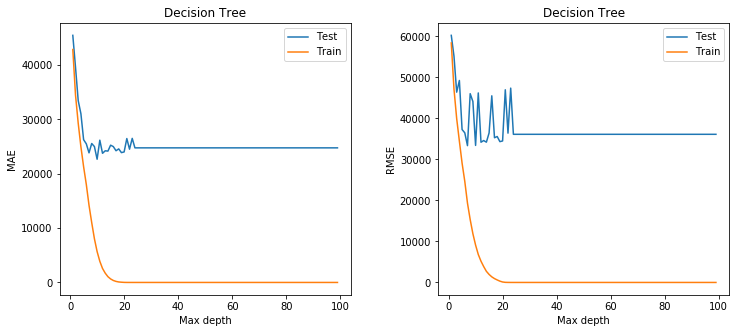

In [119]:
DecisionTreeRegression(train,test)

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
       این مدل overfit دارد همان طور که دیده می شود در ابتدا خطا ها تقریبا نزدیک هم هستند و بالا بردن عمق به شدت از هم دور می شوند علت این امر این است که با بیشتر شدن عمق مدل وارد جزئیات بیشتری می شود و به همین علت برای train به شدت خوب عمل می کند در حالی که برای تست این اتفاق نمی افتد بهترین عمق جایی است که هر دو داده ی trainوtest نتایج نزدیک به هم و خطای کم داشته باشند. این نقطه تقریبا در عمق 5  است.همچنین می توان دید درخت تقریبا در عمق 22  به بیشترین عمق خود رسیده و پس از آن نتایج ثابت مانده اند.
</div>

In [122]:
def calculate_error_DecisionTree(train,test,depth):
    dt = DecisionTreeRegressor(max_depth = depth,random_state=10)
    dt.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])
    
    y_pred_test = dt.predict(test.drop(['SalePrice'], axis=1))
    y_pred_train = dt.predict(train.drop(['SalePrice'], axis=1))
        
    MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
    RMSE_train = math.sqrt(mean_squared_error(train['SalePrice'],y_pred_train))
        
    MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
    RMSE_test = math.sqrt(mean_squared_error(test['SalePrice'],y_pred_test))
    
    return MAE_train,RMSE_train,MAE_test,RMSE_test

MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_DecisionTree(train,test,5)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  21302.341412037913
RMSE_train:  29091.909760949333
MAE_test:  26275.90734196708
RMSE_test:  37278.219588919565


<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;"> 
    <b>Linear Regression</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
داده ها آموزش و تست به مدل داده شده است و به کمک رگرسیتون خطی نتایج نشان داده شده است می توان دید که این مدل از بقیه مدل ها بهتر عمل کرده و خطاهای کمتری حاصل می شود.همچنین مشاهده می شود که نتایج حاصل برای هر دو داده نزدیک به هم هستند و overfit اتفاق نیوفتاده است.
 </div>

In [33]:
def calculate_error_LinearRegression(train,test):
    lr = LinearRegression()

    lr.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])
    
    y_pred_test = lr.predict(test.drop(['SalePrice'], axis=1))
    y_pred_train = lr.predict(train.drop(['SalePrice'], axis=1))

    MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
    RMSE_train = mean_squared_error(train['SalePrice'],y_pred_train, squared=False)
        
    MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
    RMSE_test = math.sqrt(mean_squared_error(test['SalePrice'],y_pred_test))
    
    return MAE_train,RMSE_train,MAE_test,RMSE_test
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_LinearRegression(train,test)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  18751.003735167305
RMSE_train:  29200.114084623332
MAE_test:  19785.521561037956
RMSE_test:  28499.84399530034


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
جهت مقایسه ی روش های پیش پردازش روش های مختلف را در هر مدل بررسی کرده و نتایج را مقایسه می کنیم
</div>

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;"> 
    <b>پیش پردازش و KNN</b>
</div>  

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>حذف داده های گم شده – استفاده از one_hot_encoding</li>
</div>

In [104]:
neighbours = 5

In [105]:
p_data = fill_not_real_nans(data)
p_data = drop_all_columns_missing(p_data)
p_data = one_hot_encoding(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_KNN(train,test,neighbours)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  24347.0195004029
RMSE_train:  38118.75956447574
MAE_test:  31053.233789954338
RMSE_test:  47684.11952238995


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>حذف داده های گم شده – استفاده از target_encoding </li>
</div>

In [36]:
p_data = fill_not_real_nans(data)
p_data = drop_all_columns_missing(p_data)
p_data = target_encoding(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_KNN(train,test,neighbours)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  29135.952941176467
RMSE_train:  45270.90492582118
MAE_test:  31888.527701674277
RMSE_test:  45874.20764570114


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>پر کردن داده های گم شده به کمک میانه - استفاده از target_encoding </li>
</div>

In [37]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_KNN(train,test,neighbours)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  27444.52397260274
RMSE_train:  43897.44431106105
MAE_test:  29823.367884322677
RMSE_test:  43878.08640317499


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>پر کردن داده های گم شده به کمک میانه - استفاده از target_encoding – استاندارد سازی داده</li>
</div>

In [38]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = standardize_data(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_KNN(train,test,neighbours)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  24826.498603276927
RMSE_train:  41652.20594588915
MAE_test:  26483.29901065449
RMSE_test:  41624.66093134389


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>
پر کردن داده های گم شده به کمک میانه - استفاده از target_encoding – نرمال سازی داده
</li>
</div>

In [39]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = normalize_data(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_KNN(train,test,neighbours)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  26903.699006177816
RMSE_train:  44223.96907751869
MAE_test:  28783.558523592084
RMSE_test:  43834.82448469096


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <b>مقایسه نتایج</b>
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
تفاوت میان حالت های اول و دوم تنها در نوع انکدینگ است.target_encoding یک روش supervised است در حالی که one_hot_encoding یک روش unsupervised است.
   <br/>
    در روش های supervised بسته به مقدار خود ویژگی انکدینگ انجام می شود.در حالی که در روش های unsupervised برای انکدینک به مقدار ستون هدف هم توجه می شود.به همین علت می توان دید استفاده از target_encoding تاثیر زیادی بر بهبود خطا داشته است.
    <br/>
    تفاوت میان حالت دوم و سوم در نوع پر کردن داده های گم شده است همان طور که از نتایج پیداست پر کردن داده به کمک میانه از حذف ستون های دارای داده ی گم شده بهتر عمل می کند.
    <br/>
    حالت چهارم از دو پردازش خوب سه حالت قبلی استفاده می کند و به آن استاندارد سازی داده را نیز اضافه می کند مشاهده می شود که در این حالت باز هم نتایج بهبود می یابند.
    <br/>
    در حالت آخر نیز به جای استاندارد سازی داده را نرمال شده اند نتایج نشان می دهد نرمال سازی به نسبت استاندارد ضعیف تر عمل کرده است اما همچنان نسبت به حالت سوم بهتراست.


 </div>

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;"> 
    <b>پیش پردازش و DescisionTree</b>
</div>  

In [40]:
max_depth = 5

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>حذف داده های گم شده – استفاده از one_hot_encoding</li>
</div>

In [41]:
p_data = fill_not_real_nans(data)
p_data = drop_all_columns_missing(p_data)
p_data = one_hot_encoding(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_DecisionTree(train,test,max_depth)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  14206.412949719526
RMSE_train:  19323.430324720743
MAE_test:  23856.34792684046
RMSE_test:  33349.72211222637


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>حذف داده های گم شده – استفاده از target_encoding </li>
</div>

In [42]:
p_data = fill_not_real_nans(data)
p_data = drop_all_columns_missing(p_data)
p_data = target_encoding(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_DecisionTree(train,test,max_depth)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  14133.351952195888
RMSE_train:  19164.645353596356
MAE_test:  24753.226661302277
RMSE_test:  33626.59011718955


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>پر کردن داده های گم شده به کمک میانه - استفاده از target_encoding </li>
</div>

In [43]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_DecisionTree(train,test,max_depth)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  14148.172795601742
RMSE_train:  19150.431961229784
MAE_test:  24722.51239195433
RMSE_test:  33924.32246959331


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>پرکردن داده های گم شده به کمک میانه - استفاده از target_encoding – استاندارد سازی داده</li>
</div>

In [44]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = standardize_data(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_DecisionTree(train,test,max_depth)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  14148.172795601742
RMSE_train:  19150.431961229784
MAE_test:  24722.51239195433
RMSE_test:  33924.32246959331


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>
پرکردن داده های گم شده به کمک میانه - استفاده از target_encoding – نرمال سازی داده
</li>
</div>

In [45]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = normalize_data(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_DecisionTree(train,test,max_depth)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  14148.172795601742
RMSE_train:  19150.431961229784
MAE_test:  24722.51239195433
RMSE_test:  33924.32246959331


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <b>مقایسه نتایج</b>
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
بین حالت یک و دو تنها تفاوت در نوع اینکدینگ است همان طور که دیده می شود دوباره target_encoding نتایج بهتری می دهد.
<br/>
از مقایسه ی حالت دو و سه نیز می توان به این نتیجه رسید که با پر کردن داده های خالی به کمک میانه به نتایج بهتری میرسیم. اما این تفاوت خیلی زیاد نیست.
<br/>
    حالت چهار از بین حالت های قبلی ویژگی های بهتر را بر می دارد و داده ها را نیز استاندارد می کند.می بینیم که استاندارد سازی هیچ تغییری بر روی نتیجه نداده است.
    <br/>
    در حالت پنج نرمال سازی دقیقا همان نتایج حالت استاندارد را بر میگرداند در حالی که درمدل قبلی دیدیم که نرمال سازی خطا را بیشتر می کرد.
</div>

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;"> 
    <b>پیش پردازش و LinearRegression</b>
</div> 

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>حذف داده های گم شده – استفاده از one_hot_encoding</li>
</div>

In [46]:
p_data = fill_not_real_nans(data)
p_data = drop_all_columns_missing(p_data)
p_data = one_hot_encoding(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_LinearRegression(train,test)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  12911.816631734926
RMSE_train:  20297.348255520203
MAE_test:  18946.624187123958
RMSE_test:  28138.056621973403


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>حذف داده های گم شده – استفاده از target_encoding </li>
</div>

In [47]:
p_data = fill_not_real_nans(data)
p_data = drop_all_columns_missing(p_data)
p_data = target_encoding(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_LinearRegression(train,test)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  18172.145669483016
RMSE_train:  28083.890947121432
MAE_test:  20798.682478409653
RMSE_test:  28753.390097818283


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>پر کردن داده های گم شده به کمک میانه - استفاده از target_encoding </li>
</div>

In [48]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_LinearRegression(train,test)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  18006.440999178423
RMSE_train:  27792.532124945672
MAE_test:  20596.475165665423
RMSE_test:  28466.720791277265


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>پر کردن داده های گم شده به کمک میانه - استفاده از target_encoding – استاندارد سازی داده</li>
</div>

In [49]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = standardize_data(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_LinearRegression(train,test)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  17996.927237501834
RMSE_train:  27791.977536268347
MAE_test:  20590.74279785078
RMSE_test:  28476.65093123234


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <li>پر کردن داده های گم شده به کمک میانه - استفاده از target_encoding – نرمال سازی داده</li>
</div>

In [50]:
p_data = fill_not_real_nans(data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = normalize_data(p_data)
x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
MAE_train,RMSE_train,MAE_test,RMSE_test = calculate_error_LinearRegression(train,test)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)

MAE_train:  18007.189753836396
RMSE_train:  27792.58789856188
MAE_test:  20603.19512237112
RMSE_test:  28472.980075432297


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <b>مقایسه نتایج</b>
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
در این جا نیز تنها تفاوت بین حالت یک و دو تفاوت در نوع اینکدینگ است.برای مقایسه ی این دو حالت می توان گفت one_hot_encoding خطای کمتری داده است اما نکته ای که باید به آن توجه داشت این است که خطاهای محاسبه شده برای داده های آموزشی و تست از هم فاصله ی زیادی دارد در حالی که در حالت دوم این دو مقدار بسیار به یکدیگر نزدیک هستند و خطا هم خطای بالایی نیست.
    <br/>
    از مقایسه ی حالت دو و سه نیز می توان به این نتیجه رسید که با پر کردن داده های خالی به کمک میانه به نتایج بهتری میرسیم.
    <br/>
    در حالت چهارم و با استاندارد سازی داده ها دوباره به خطاهای کمتری میرسیم ولی تغییر خطا ها به نسبت حالت قبل بسیار کوچک می باشد.
    <br/>
    در آخر نیز نرمال سازی داده تغییر بسیار کمی نسبت به حالت استاندارد دارد ولی همچنان استاندارد سازی به جز در یک مورد نتایج بهتری داده است.
    
    
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
با نگاه کلی به سه مدل می توان یافت تاثیر نوع اینکدینگ که supervised باشد یا  unsupervised از همه بیشتر و پس از آن تاثیر پر کردن داده ها با میانه بوده است.
  </div>

<div style="direction:rtl;font-size: 18px;text-align: justify;line-height: 1.6;"> 
    <b>فازسوم:Ensemble Methods</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 در این فاز برای پیش بینی نتایج از یادگیری گروهی استفاده می شود.یادگیری گروهی به این معناست که از تجمیع نتایج حاصل از تعدادی مدل، پیش بینی نهایی را انجام دهیم.در این جا به دو مدل پرداخته شده است:Random Forest و Voting Regression
</div>

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;"> 
    <b>Random Forest</b>
</div>
<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    در روش Random Forest تعدادی Decision Tree با ویژگی ها و داده های مختلف کنار هم قرار گرفته و هر کدام جداگانه یادگیری را انجام می دهند و در نهایت میان آن ها به طریقی رای گیری می شود.در این مدل تاثیر دو هایپر پارامتر یعنی تعداد estimator ها و عمق بیشینه مورد بررسی قرار گرفته است و برای هر یک از 1 تا 100 این مقادیر را تغییر را داده و نتایج را بر روی یک نمودار رسم میکنیم.
</div>

In [51]:
def RandomForestRegression(train,test,hyper_parameter):
    train_MAE,train_RMSE,test_MAE,test_RMSE = [],[],[],[]
    for i in range(1,100):
        if(hyper_parameter == 'n_estimator'):
            rf = RandomForestRegressor(n_estimators = i ,random_state = 10)
        else:
            rf = RandomForestRegressor(max_depth = i,random_state = 10)
            
        rf.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])
        
        y_pred_test = rf.predict(test.drop(['SalePrice'], axis=1))
        y_pred_train = rf.predict(train.drop(['SalePrice'], axis=1))

        MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
        RMSE_train = mean_squared_error(train['SalePrice'],y_pred_train, squared=False)
        
        train_MAE.append(MAE_train)
        train_RMSE.append(RMSE_train)
        
        MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
        RMSE_test = mean_squared_error(test['SalePrice'],y_pred_test, squared=False)
        
        test_MAE.append(MAE_test)
        test_RMSE.append(RMSE_test)
 
    fig, axes = plt.subplots(1, 2, figsize=(12,5), squeeze=False)
    fig.subplots_adjust(wspace=0.3)
    axes[0][0].plot(list(range(1, 100)),test_MAE, label='Test')
    axes[0][0].plot(list(range(1, 100)),train_MAE , label='Train')
    axes[0][0].set_ylabel('MAE')
    axes[0][0].set_xlabel(hyper_parameter)
    axes[0][0].set_title('Random Forest')
    axes[0][0].legend()
    axes[0][1].plot(list(range(1, 100)),test_RMSE, label='Test')
    axes[0][1].plot(list(range(1, 100)),train_RMSE , label='Train')
    axes[0][1].set_ylabel('RMSE')
    axes[0][1].set_xlabel(hyper_parameter)
    axes[0][1].set_title('Random Forest')
    axes[0][1].legend()



In [52]:
p_data = data.drop(low_variance,axis = 1)
p_data = fill_not_real_nans(p_data)
p_data = target_encoding(p_data)
p_data = fill_missing_by_median(p_data)
p_data = standardize_data(p_data)

x, y = p_data.drop(['SalePrice'], axis=1),p_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
    

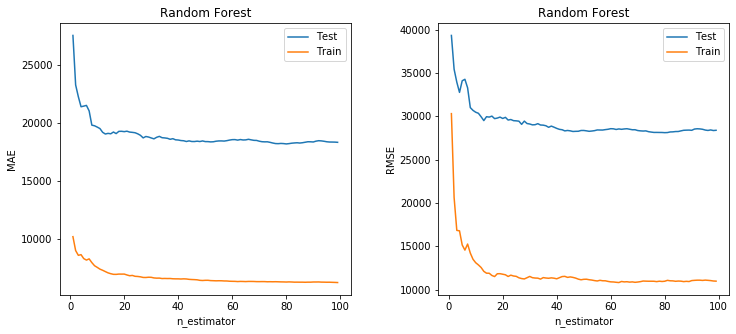

In [53]:
RandomForestRegression(train,test,"n_estimator")

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;"> 
نمودار بالا overfit را نشان می دهد اما علت این امر پارامتر max_depth است.چرا که اگر مقدار max_depth مشخص نشود درخت تا جایی ادامه پیدا می کند که در برگ ها به یک کلاس برسیم و هر چه قدر در عمق پیش می رویم جزئیات بیشتری از داده آموزشی را مدل میکنیم که باعث overfit شدن مدل می شود.همچنین تا عمق تقریبا 17 زیاد شدن تعداد estimator ها خطا را با شیب زیادی کاهش می دهد ولی بعد از آن این کاهش با سرعت کمتری انجام می شود.دو خطا در هر دو نمودار فاصله ی زیادی از یک دیگر دارند و انتخاب نقطه ای که به هم نزدیک تر باشند مشکل است .
</div>

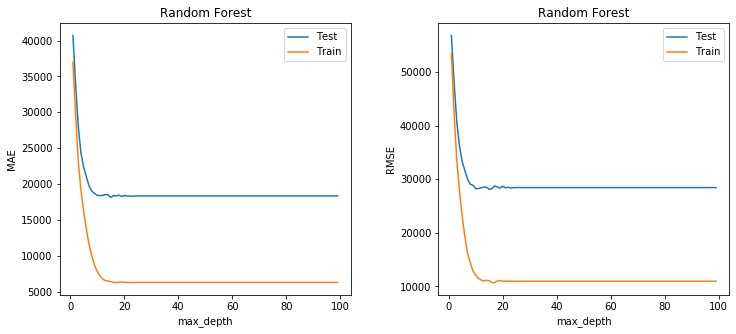

In [54]:
RandomForestRegression(train,test,"max_depth")

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
همان طور که در بالا گفته شد افزایش عمق باعث بروز overfitting می شود  که در نمودار نیز مشخص است.
    
</div>

In [65]:

rf = RandomForestRegressor(n_estimators=5,max_depth =3,random_state = 10)

rf.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])

y_pred_test = rf.predict(test.drop(['SalePrice'], axis=1))        
y_pred_train = rf.predict(train.drop(['SalePrice'], axis=1))
        
MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
RMSE_train = mean_squared_error(train['SalePrice'],y_pred_train, squared=False)
        
        
MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
RMSE_test = mean_squared_error(test['SalePrice'],y_pred_test, squared=False)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)        

MAE_train:  24332.586700461336
RMSE_train:  35156.7897220088
MAE_test:  28884.72599466269
RMSE_test:  42090.602175240594


In [123]:
clf1 = KNeighborsRegressor(n_neighbors=5)
clf2 = DecisionTreeRegressor(max_depth = 5,random_state=10)
clf3 = LinearRegression()

clf1.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])
clf2.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])
clf3.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])


vreg = VotingRegressor( estimators = [ ('decision_tree', clf2),('linear_regression',clf3)])

vreg = vreg.fit(train.drop(['SalePrice'], axis=1),train['SalePrice'])

y_pred_test = vreg.predict(test.drop(['SalePrice'], axis=1))        
y_pred_train = vreg.predict(train.drop(['SalePrice'], axis=1))
        
MAE_train = mean_absolute_error(train['SalePrice'],y_pred_train)
RMSE_train = mean_squared_error(train['SalePrice'],y_pred_train, squared=False)
               
MAE_test = mean_absolute_error(test['SalePrice'],y_pred_test)
RMSE_test = mean_squared_error(test['SalePrice'],y_pred_test, squared=False)
print("MAE_train: ",MAE_train)
print("RMSE_train: ",RMSE_train)
print("MAE_test: ",MAE_test)
print("RMSE_test: ",RMSE_test)  

MAE_train:  14217.626183686472
RMSE_train:  20506.94294318741
MAE_test:  18721.317056694854
RMSE_test:  28273.37153350398


<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
Voting regression از خروجی چند مدل برای پیش بینی جواب استفاده می کند و در نهایت برای جواب از تمام مدل های موجود در آن استفاده می کند بنابراین با احتمال بیشتری جواب درست می دهد و احتمال خطا پایین است اما ممکن است در بعضی موارد یکی از مدل های آن overfitting زیادی داشته باشد که بر روی خود مدل اصلی نیز تاثیر بگذارد.اگر دقت کنیم می بینیم خطاهای این مدل از مدل LinearRegression بیشتر است اما در مدل LinearRegression نتایج بر روی داده های آموزشی و تست خیلی به هم نزدیک تر بودند.
</div>